# Krittika Convener Selection
## Python Assignment

1. You may find the KSP tutorials useful: https://github.com/krittikaiitb/tutorials - Tutorials 1,2,3, and 4 are particularly relevant. These cover basic python, numpy, functions in python and matplotlib respectively.

2. A helpful reminder that executing a cell with help (for example: help(np.loadtxt) or np.loadtxt?) will show the documentation for that function.

3. The use of internet is completely ALLOWED for solving this assignment.

4. Feel free to use multiple cells for your solutions, this would make your code easier to understand in a step-by-step fashion. But keep them separate for each question (don't use a cell to solve Q1 after Q2).

5. Try to keep your code neat and make use of comments and/or markdown cells to explain what you have done.

### Q1: Parsing Form Responses
Suppose that you are a convener and it has been a few months into your tenure. We have organized an event focused at the newly joining freshers(your juniors).

We floated a Google form to collect their details and get them registered. We planned to contact them all via WebMail to send them details of the event.

While going through the responses, you discover that your co-convener forgot to filter inputs in the form! There appear to be many invalid roll numbers - we cannot contact these students via WebMail. Here are the first few entries:

| Sr. No. | Name | Roll Number | Contact Number |
|---------|------|-------------|----------------|
| 1       | MV   | 220070044   | 986937546      |
| 2       | DV   | 22b280013   | 961101307      |
| 3       | RR   | 21070042    | 908204532      |
| 4       | YB   | 220030019   | 947226579      |

As you can see, we can already see an erroneous LDAP in the $3$rd input.

Your task here is to find out the submissions with wrong roll numbers and filter them out. We would reach out to such people using their contact numbers. Your final output should be the names and contact numbers of these people.

*PS : As you might suspect, this data is sourced from an actual event from our tenure. It has been anonymized and the errors have been exaggerated :)*

In [1]:
file1 = 'Dataset_Q1.csv' #this is the CSV file that countains all the responses

Feel free to use any libraries/standard functions that you might need to solve this problem.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
  
with open('Dataset_Q1.csv', 'r') as f:
    lines = f.read().split('\n')
    del lines[0]
    data=[]   
for a in lines:
    data.append(a.split(','))
del data[len(data)-1]

roll=[]
for i in range(len(data)): 
    roll.append(data[i][2])
roll_nospace= [s.replace(" ", "") for s in roll]

error_sr=[]
for i in range(len(roll_nospace)):
    if len(roll_nospace[i])!=9:
        error_sr.append('{}'.format(i+1))
        
for i in range(len(roll_nospace)):
    if roll_nospace[i][2]=='0':
        pass
    elif roll_nospace[i][2]=='d':
        pass
    elif roll_nospace[i][2]=='D':
        pass
    elif roll_nospace[i][2]=='b':
        pass
    elif roll_nospace[i][2]=='B':
        pass
    else:
        error_sr.append('{}'.format(i+1))
for i in range(len(roll_nospace)):
    if roll_nospace[i][0]=='2':
        if roll_nospace[i][1]=='2' or roll_nospace[i][1]=='1' or roll_nospace[i][1]=='0':
            pass
        else:
            error_sr.append('{}'.format(i+1))    
    else:
        error_sr.append('{}'.format(i+1))

error_srf = []
for i in error_sr:
    if i not in error_srf:
       error_srf.append(i)
    
print("{:<9}{:<8}".format("Name", "Contact No."))
print("-"*22)
for i in data:
    if i[0] in error_srf:
         print(f"{i[1]:<10}{i[3]:<8}")

Name     Contact No.
----------------------
RR        908204532
BP        980849718
HN        996237090
SP        936914944
JS        979691534
TY        975486837
PM        996497703
DJ        927000264
VN        918746674
SN        902766352
AR        992993873
AK        940028846
AD        913983110
SS        914286714
DS        914030157
AB        934220771
SJ        951759618
MM        918359105


#### Bonus part:
Amongst the valid entries, what proportion are actually freshers? Remember that we intended to target them with this event. The majority seem to be freshers but you will also find some second and third year students. You can identify each of these groups by the first two digits of their roll numbers. 

Your task is to graphically depict the number of applicants across the three batches.

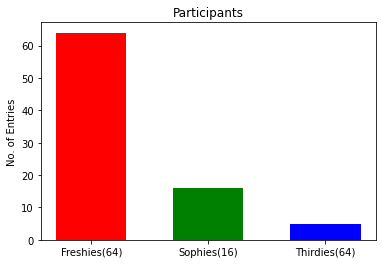

In [3]:
set_sr=[]
for i in range(len(roll_nospace)):
    set_sr.append('{}'.format(i+1))
valid=[x for x in set_sr if x not in error_srf]
valid

f=0
s=0
t=0
for i in valid:
    if roll_nospace[int(i)-1][1]=='2':
        f+=1
    if roll_nospace[int(i)-1][1]=='1':
        s+=1
    if roll_nospace[int(i)-1][1]=='0':
        t+=1

# x-coordinates of left sides of bars 
left = [1, 2, 3]
  
# heights of bars
height = [f, s, t]
  
# labels for bars
tick_label = ['Freshies({})'.format(f), 'Sophies({})'.format(s), 'Thirdies({})'.format(f)]
  
plt.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['red', 'green','blue'])
 
plt.ylabel('No. of Entries')
plt.title('Participants')
plt.show()


### Q2: A New Discovery
During one of our regular stargazing sessions, you and your co-conveners discover a new blip of light that shouldn't be there. After examining it a bit, you realise that this object is not quite like anything the world has seen before. You share your data with club seniors and make a startling find - its the first of its kind of a completely new class of objects. An ex-secy of the club, Siddhant Tripathy, analyses it extensively and declares that its actually the first ever **endoplanet** to be found. You and your team are now international celebrities, but its time to organise an event so that people from insti can see this.

Your task is to find out when exactly Tripps' endoplanet would be at its brightest and organise a stargazing session on that date so that everyone can see it for themselves. You have data from a month of observations of this object and you need to extrapolate it to find the peak.

In [4]:
file2 = 'Dataset_Q2.csv'

According to your analysis, this object is in a special orbit that gives it a roughly Gaussian light curve i.e. the plot of [magnitude](https://en.wikipedia.org/wiki/Apparent_magnitude) v/s time roughly follows an inverted Gaussian function. Recall that a generic Gaussian function with unit amplitude is given by

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left({-\frac{1}{2}{\left(\frac{x-\mu}{\sigma}\right)}^2}\right)$$ 

where $\mu$ is the mean of the distribution it describes and $\sigma$ is the standard deviation. More about it [here](https://archive.lib.msu.edu/crcmath/math/math/g/g087.htm).

Your task is to find the date at which the endoplanet will be at it's brightest, along with how bright its expected to be. Also plot the original data along with the fitted curve.

You can do this by fitting a gaussian to the light curve data and locating its extremum. You may find `scipy.optimize.curve_fit` useful. 

**Important** : Our fit function must be a Gaussian with a vertical offset. The problem is that `curve_fit` tends to misbehave in this particular example when you ask it to guess that offset, so assume it to be $9.0$ to solve this problem. This, of course, implies that the baseline magnitude of the object is $9.0$

    Night No.    Date  Magnitude
0           1  12-May       8.86
1           2  13-May       8.85
2           3  14-May       8.89
3           4  15-May       8.87
4           5  16-May       9.02
5           6  17-May       8.92
6           7  18-May       8.89
7           8  19-May       8.95
8           9  20-May       8.82
9          10  21-May       8.72
10         11  22-May       8.87
11         12  23-May       8.74
12         13  24-May       8.55
13         14  25-May       8.61
14         15  26-May       8.48
15         16  27-May       8.32
16         17  28-May       8.35
17         18  29-May       8.14
18         19  30-May       8.20
19         20  31-May       8.09
20         21  01-Jun       7.96
21         22  02-Jun       7.63
22         23  03-Jun       7.58
23         24  04-Jun       7.57
24         25  05-Jun       7.30
25         26  06-Jun       7.00
26         27  07-Jun       7.02
27         28  08-Jun       6.70
28         29  09-Jun       6.66
29        

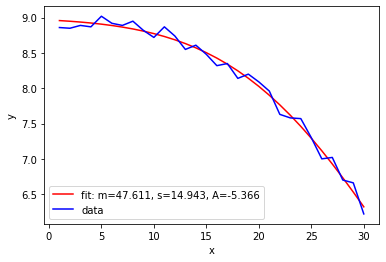

[47.61056202 14.94333188 -5.36592618]
[[ 38.60656285  11.61931163 -11.02833368]
 [ 11.61931163   3.55162748  -3.27694264]
 [-11.02833368  -3.27694264   3.1883169 ]]
The mean is : 47.61056202169032
The date is : 28-06-2022 (Approximately)
The brightest value is :  3.6340738247115176
The value on 28-06-2022 is : 3.6358957169226755


In [5]:
import numpy as np, pandas as pd, scipy, matplotlib.pyplot as plt, datetime

from scipy.optimize import curve_fit

df = pd.read_csv("Dataset_Q2.csv")

print(df.to_string())

def gaussian(x,m,s,A):
    return A * np.exp((-1*(x-m)**2) / (2*s*s)) + 9

xdata = df["Night No."]
ydata = df.Magnitude

popt, pcov = curve_fit(gaussian, xdata, ydata)
plt.plot(xdata, gaussian(xdata, *popt), 'r-',
         label='fit: m=%5.3f, s=%5.3f, A=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b-', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(popt)
print(pcov)

date_st = datetime.date(2022,5,11)
date_actual = date_st + datetime.timedelta(days=np.ceil(popt[0]))
print("The mean is :",popt[0])
print("The date is :",date_actual.strftime("%d-%m-%Y"), "(Approximately)")
print("The brightest value is : ",9 + popt[2])
print("The value on",date_actual.strftime("%d-%m-%Y"),"is :",gaussian(np.ceil(popt[0]),popt[0],popt[1],popt[2]))


#### Bonus part:

Can this date be trusted? We wouldn't want to claim the endoplanet is the brightest on a particular day and then have it brighten up even more later. Try to ascertain the error in this predicted date. Read the documentation of `curve_fit` and try to understand the statistical significance of the quantities it returns.

In [6]:
perr = np.sqrt(np.diag(pcov))
print("The error in the date is : ",perr[0]) #The covariance matrix contains the variance errors of all the parameters and the covariance of one wrt another
date_start = date_st + datetime.timedelta(days=np.floor(popt[0] - perr[0]))
date_end = date_st + datetime.timedelta(days=np.ceil(popt[0] + perr[0]))
print("To find the star at it's brightest, the dates to be checked are from",date_start,"to",date_end)


The error in the date is :  6.213417968358614
To find the star at it's brightest, the dates to be checked are from 2022-06-21 to 2022-07-04
